<a href="https://colab.research.google.com/github/dmburns1729/Class-Files/blob/main/Sales_Prediction_Regressions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sales Prediction Regressions

## Project 1 - Part 5 (Core)

Three regressions for



In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')

In [ ]:
# Import the data
path = '/content/sales_predictions (2).csv'
df = pd.read_csv(path)
df


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [ ]:
# make a copy of original data
df_original = df.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
# Check categorical columns for consistancy
# select only object columns
categoricals = df.select_dtypes(include='object')

# check value counts for each object column
for col in categoricals.columns:
  print(col)
  print(categoricals[col].value_counts(), '\n')

Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64 

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64 

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64 

Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    55

In [ ]:
Item_Fat_Content_col = {'LF':'Low Fat','reg':'Regular', 'low fat':'Low Fat'}
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(Item_Fat_Content_col)
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

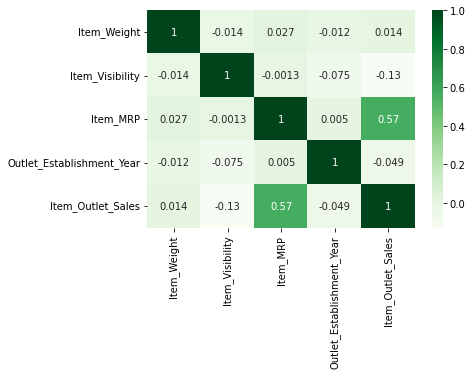

In [ ]:
import pandas as pd
corr = df.corr()
import seaborn as sns
sns.heatmap(corr, cmap = 'Greens', annot = True);

In [ ]:
# split X and y, you are predicting price
# There is virtually no correlation with sales and 'Item_Identifier', 'Outlet_Identifier', 'Item_Weight' , 'Outlet_Establishment_Year'
# so we are eliminating that data from the data set
# The shear number of values in the 'object' field 'Item_Identifier' really junked up our OHE in our first regression (not included in this analysis)

X = df.drop(columns={'Item_Outlet_Sales', 'Item_Identifier','Outlet_Identifier', 'Item_Weight','Outlet_Establishment_Year'})
y = df['Item_Outlet_Sales']

# split training and test
# set random_state to 42 for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
X_test

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
7503,Low Fat,0.026300,Frozen Foods,79.4302,High,Tier 3,Supermarket Type1
2957,Low Fat,0.071136,Health and Hygiene,42.7086,Small,Tier 1,Supermarket Type1
7031,Regular,0.041313,Canned,42.0454,Medium,Tier 1,Supermarket Type1
1084,Regular,0.044767,Soft Drinks,173.7054,Medium,Tier 3,Supermarket Type3
856,Regular,0.012456,Meat,197.5110,Small,Tier 2,Supermarket Type1
...,...,...,...,...,...,...,...
4753,Low Fat,0.007994,Dairy,171.6422,High,Tier 3,Supermarket Type1
4836,Low Fat,0.000000,Frozen Foods,143.1154,NaN,Tier 2,Supermarket Type1
8064,Low Fat,0.128296,Fruits and Vegetables,210.4902,NaN,Tier 2,Supermarket Type1
4418,Low Fat,0.026226,Household,119.0098,Medium,Tier 1,Supermarket Type1


In [ ]:
#instantiate the StandardScaler, OneHotEncoder, and Imputers
scaler = StandardScaler()
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

mean_imputer = SimpleImputer(strategy='mean')
freq_imputer = SimpleImputer(strategy='constant', fill_value='Missing')
# I am using "Missing" as the fill value since I don't want to dirty the data
# Later we will see that the missing values are probably all small grocery stores
# but for how we will just classify them as 'Missing'

# Setup the pipelines for the numeric and categorical data

num_pipeline = make_pipeline(mean_imputer, scaler)
# I don't technically need the mean_imputer here since I dropped the item weight
# I ran through the index filling in the item weights based on groupy product type
# but it didn't make any difference and was virtually not correlated with the
# Item_Outlet_Sales

nom_pipeline = make_pipeline(freq_imputer, ohe)

# Selectors
num_selector = make_column_selector(dtype_include='number')
nom_selector = make_column_selector(dtype_include='object')

# Setup the tuples to pair the processors with the make column selectors

numeric_tuple = (num_pipeline, num_selector)
nominal_tuple = (nom_pipeline, nom_selector)

# Instantiate the make column transformer
preprocessor = make_column_transformer(numeric_tuple,
                                       nominal_tuple,
                                       remainder='drop')

# Fit the column transformer on the X_train
preprocessor.fit(X_train)

# Transform the X_train and the X_test

X_train_transformed = preprocessor.transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Check for missing values and that data is scaled and one-hot encoded
print(np.isnan(X_train_transformed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_transformed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_transformed.dtype)
print('All data in X_test_processed are', X_test_transformed.dtype)
print('\n')
print('shape of data is', X_train_transformed.shape)
print('\n')
X_train_transformed

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (6392, 31)




array([[-0.71277507,  1.82810922,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       [-1.29105225,  0.60336888,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 1.81331864,  0.24454056,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.92052713,  1.52302674,  1.        , ...,  1.        ,
         0.        ,  0.        ],
       [-0.2277552 , -0.38377708,  1.        , ...,  1.        ,
         0.        ,  0.        ],
       [-0.95867683, -0.73836105,  1.        , ...,  1.        ,
         0.        ,  0.        ]])

# Perform a linear regression on the data

In [ ]:
# Step 1: Import the and instantiate the model.

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

lin_reg = LinearRegression()

lin_reg_pipe = make_pipeline(preprocessor, lin_reg)

lin_reg_pipe.fit(X_train, y_train)

train_predictions = lin_reg_pipe.predict(X_train)
test_predictions = lin_reg_pipe.predict(X_test)

average_sales = round(df_original['Item_Outlet_Sales'].mean(),1)
print(f'Average Item Outlet Sales: {average_sales}\n')

train_r2 = round(r2_score(y_train, train_predictions),3)
test_r2 = round(r2_score(y_test, test_predictions),3)

print(f'Model Training R2: {train_r2}')
print(f'Model Testing R2: {test_r2}\n')

train_MAE = round(mean_absolute_error(y_train, train_predictions),1)
test_MAE = round(mean_absolute_error(y_test, test_predictions),1)

print(f'Model Training MAE: {train_MAE}')
print(f'Model Testing MAE: {test_MAE}\n')


train_MSE = round(mean_squared_error(y_train, train_predictions),1)
test_MSE = round(mean_squared_error(y_test, test_predictions),1)

print(f'Model Training MSE: {train_MSE}')
print(f'Model Testing MSE: {test_MSE}\n')


train_RMSE = round(np.sqrt(train_MSE),1)
test_RMSE = round(np.sqrt(test_MSE),1)

print(f'Model Training RMSE: {train_RMSE}')
print(f'Model Testing RMSE: {test_RMSE}\n')



Average Item Outlet Sales: 2181.3

Model Training R2: 0.561
Model Testing R2: 0.566

Model Training MAE: 847.1
Model Testing MAE: 805.5

Model Training MSE: 1298710.5
Model Testing MSE: 1197114.5

Model Training RMSE: 1139.6
Model Testing RMSE: 1094.1



## Results of the regression

This model performed much better than the first attempt (which was not included) after removing the unnecessary data.  However, an R2 of ~.57 is not a great explaination of the variation in the data.  That said, it doesn't look overfit to the data and the RMSE indicates that there aren't many large outliers.  Mean absolute error of 805.5 represents 36.9% of the average item outlet sales which could be better.

# Simple Regression Tree Model

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dec_tree = DecisionTreeRegressor(random_state = 42)
dec_tree_pipe = make_pipeline(preprocessor, dec_tree)
dec_tree_pipe.fit(X_train, y_train)

train_preds = dec_tree_pipe.predict(X_train)
test_preds = dec_tree_pipe.predict(X_test)

In [ ]:
train_predictions_tree = dec_tree_pipe.predict(X_train)
test_predictions_tree = dec_tree_pipe.predict(X_test)

average_sales = round(df_original['Item_Outlet_Sales'].mean(),1)
print(f'Average Item Outlet Sales: {average_sales}\n')

train_r2_tree = round(r2_score(y_train, train_predictions_tree),3)
test_r2_tree = round(r2_score(y_test, test_predictions_tree),3)

print(f'Model Training R2: {train_r2_tree}')
print(f'Model Testing R2: {test_r2_tree}\n')

train_MAE_tree = round(mean_absolute_error(y_train, train_predictions_tree),1)
test_MAE_tree = round(mean_absolute_error(y_test, test_predictions_tree),1)

print(f'Model Training MAE: {train_MAE_tree}')
print(f'Model Testing MAE: {test_MAE_tree}\n')

train_MSE_tree = round(mean_squared_error(y_train, train_predictions_tree),1)
test_MSE_tree = round(mean_squared_error(y_test, test_predictions_tree),1)

print(f'Model Training MSE: {train_MSE_tree}')
print(f'Model Testing MSE: {test_MSE_tree}\n')

train_RMSE_tree = round(np.sqrt(train_MSE_tree),1)
test_RMSE_tree = round(np.sqrt(test_MSE_tree),1)

print(f'Model Training RMSE: {train_RMSE_tree}')
print(f'Model Testing RMSE: {test_RMSE_tree}\n')

Average Item Outlet Sales: 2181.3

Model Training R2: 1.0
Model Testing R2: 0.171

Model Training MAE: 0.0
Model Testing MAE: 1049.9

Model Training MSE: 0.0
Model Testing MSE: 2287512.2

Model Training RMSE: 0.0
Model Testing RMSE: 1512.5



In [ ]:
# This is clearly as over-fit model as measured by the large difference in the R2 terms.  We will need to tune the model

In [ ]:
dec_tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [ ]:
# You can frequently reduce overfitting in a decision tree by decreasing the depth of the tree.
# You can probably vary other parameters too!
# List of values to try for max_depth:

depths = list(range(2, 50)) # will try every value between 2 and 50
# Data frame to store the score for each value of max_depth:
scores = pd.DataFrame(index=depths, columns=['Test Score','Train Score'])
for depth in depths:
    dec_tree = DecisionTreeRegressor(max_depth=depth, random_state=42)

    dec_tree_pipe = make_pipeline(preprocessor, dec_tree)
    dec_tree_pipe.fit(X_train, y_train)

    train_score = dec_tree_pipe.score(X_train, y_train)
    test_score = dec_tree_pipe.score(X_test, y_test)
    scores.loc[depth, 'Train Score'] = train_score
    scores.loc[depth, 'Test Score'] = test_score






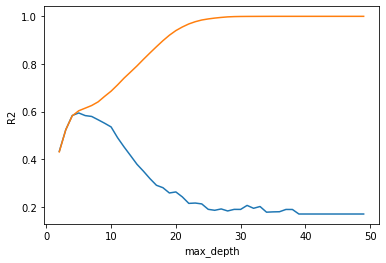

In [ ]:
# Visualize which max_depth leads to the highest r2 score
import matplotlib.pyplot as plt
plt.plot(depths, scores['Test Score'])
plt.plot(depths, scores['Train Score'])
plt.xlabel('max_depth')
plt.ylabel('R2');

In [ ]:
sorted_scores = scores.sort_values(by='Test Score', ascending=False)
sorted_scores.head()

# Super interesting how you can see the overfitting happening after depth of 5!

,Test Score,Train Score
5,0.594747,0.603925
4,0.584005,0.582625
6,0.583674,0.614877
7,0.580072,0.625968
8,0.566079,0.641332


In [ ]:
dec_tree = DecisionTreeRegressor(max_depth=5, random_state = 42)
dec_tree_pipe = make_pipeline(preprocessor, dec_tree)
dec_tree_pipe.fit(X_train, y_train)

train_preds = dec_tree_pipe.predict(X_train)
test_preds = dec_tree_pipe.predict(X_test)

In [ ]:
train_predictions_tree = dec_tree_pipe.predict(X_train)
test_predictions_tree = dec_tree_pipe.predict(X_test)

average_sales = round(df_original['Item_Outlet_Sales'].mean(),1)
print(f'Average Item Outlet Sales: {average_sales}\n')

train_r2_tree = round(r2_score(y_train, train_predictions_tree),3)
test_r2_tree = round(r2_score(y_test, test_predictions_tree),3)

print(f'Model Training R2: {train_r2_tree}')
print(f'Model Testing R2: {test_r2_tree}\n')

train_MAE_tree = round(mean_absolute_error(y_train, train_predictions_tree),1)
test_MAE_tree = round(mean_absolute_error(y_test, test_predictions_tree),1)

print(f'Model Training MAE: {train_MAE_tree}')
print(f'Model Testing MAE: {test_MAE_tree}\n')


train_MSE_tree = round(mean_squared_error(y_train, train_predictions_tree),1)
test_MSE_tree = round(mean_squared_error(y_test, test_predictions_tree),1)

print(f'Model Training MSE: {train_MSE_tree}')
print(f'Model Testing MSE: {test_MSE_tree}\n')


train_RMSE_tree = round(np.sqrt(train_MSE_tree),1)
test_RMSE_tree = round(np.sqrt(test_MSE_tree),1)

print(f'Model Training RMSE: {train_RMSE_tree}')
print(f'Model Testing RMSE: {test_RMSE_tree}\n')

Average Item Outlet Sales: 2181.3

Model Training R2: 0.604
Model Testing R2: 0.595

Model Training MAE: 762.6
Model Testing MAE: 738.3

Model Training MSE: 1172165.0
Model Testing MSE: 1118083.7

Model Training RMSE: 1082.7
Model Testing RMSE: 1057.4



## Results of the regression

This model performed better than the linear regression with an R2 of .595 versus .566.  It doesn't look like the training data is overfit judging by the the small difference in R2 measurements.  The RMSE is 1,057 versus 1,094, a small improvement and indicating that there aren't any large outliers.  However, an R2 of .595 may still benefit from further data analysis.   


# Random Forests for Regression

In [ ]:
# Import random forest Regressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf = RandomForestRegressor(random_state = 42)
rf_pipe = make_pipeline(preprocessor, rf)
rf_pipe.fit(X_train, y_train)
rf_train_predictions = rf_pipe.predict(X_train)
rf_test_predictions = rf_pipe.predict(X_test)


In [ ]:
average_sales = round(df_original['Item_Outlet_Sales'].mean(),1)
print(f'Average Item Outlet Sales: {average_sales}\n')

rf_train_r2 = round(r2_score(y_train, rf_train_predictions),3)
rf_test_r2 = round(r2_score(y_test, rf_test_predictions),3)

print(f'Model Training R2: {rf_train_r2}')
print(f'Model Testing R2: {rf_test_r2}\n')

Average Item Outlet Sales: 2181.3

Model Training R2: 0.937
Model Testing R2: 0.555



This result demonstrates overfitting of the data.  We will tune some parameters to find a better fit of the test data.

In [ ]:
# Looking at some hyperparameters that seem tunable
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [ ]:
est_depths = [estimator.get_depth() for estimator in rf.estimators_]
max(est_depths)

depths = range(1, max(est_depths))
scores = pd.DataFrame(index=depths, columns=['Test Score'])
for depth in depths:
   model = RandomForestRegressor(max_depth=depth)
   model_pipe = make_pipeline(preprocessor, model)
   model_pipe.fit(X_train, y_train)
   scores.loc[depth, 'Train Score'] = model_pipe.score(X_train, y_train)
   scores.loc[depth, 'Test Score'] = model_pipe.score(X_test, y_test)
   scores.head()






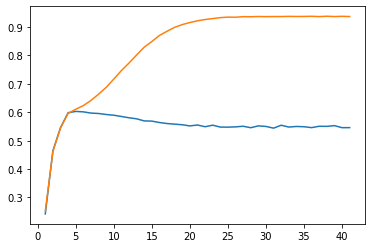

In [ ]:
# Yeash that took a lot of time!

import matplotlib.pyplot as plt

plt.plot(scores['Test Score']);
plt.plot(scores['Train Score']);


In [ ]:
# Again you can see the data overfitting on the train data set
# Interestingly, there is only a small drop in fitting on the test
# data set

In [ ]:
sorted_scores = scores.sort_values(by='Test Score', ascending=False)
sorted_scores.head()

,Test Score,Train Score
5,0.602938,0.610465
6,0.601389,0.623457
4,0.598328,0.596222
7,0.597092,0.641485
8,0.595625,0.663584


In [ ]:
n_ests = [25, 50, 100, 150, 200, 250]
scores2 = pd.DataFrame(index=n_ests, columns=['Test Score', 'Train Score'])
for n in n_ests:
   model = RandomForestRegressor(max_depth=5, n_estimators=n)
   model_pipe = make_pipeline(preprocessor, model)
   model_pipe.fit(X_train, y_train)
   scores2.loc[n, 'Train Score'] = model_pipe.score(X_train, y_train)
   scores2.loc[n, 'Test Score'] = model_pipe.score(X_test, y_test)
scores2.head()



,Test Score,Train Score
25,0.604703,0.610198
50,0.602879,0.610252
100,0.604239,0.6104
150,0.60325,0.610113
200,0.603586,0.610192


In [ ]:
sorted_scores2 = scores2.sort_values(by='Test Score', ascending=False)
sorted_scores2.head()

,Test Score,Train Score
25,0.604703,0.610198
100,0.604239,0.6104
200,0.603586,0.610192
250,0.603515,0.610326
150,0.60325,0.610113


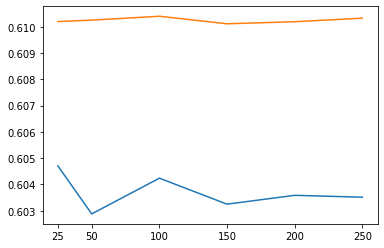

In [ ]:
plt.plot(scores2['Test Score'])
plt.plot(scores2['Train Score'])
plt.xticks(n_ests);

In [ ]:
# The y-axis isn't zero scaled so the difference looks big but it really isn't
# It is surprising how tuning this feature does very little to change the fit

n_ests = [240,245, 250, 255, 260, 265, 270, 275, 280, 285, 290, 295, 300]
scores3 = pd.DataFrame(index=n_ests, columns=['Test Score', 'Train Score'])
for n in n_ests:
   model = RandomForestRegressor(max_depth=5, n_estimators=n)
   model_pipe = make_pipeline(preprocessor, model)
   model_pipe.fit(X_train, y_train)
   scores3.loc[n, 'Train Score'] = model_pipe.score(X_train, y_train)
   scores3.loc[n, 'Test Score'] = model_pipe.score(X_test, y_test)
scores3.head()

,Test Score,Train Score
240,0.603366,0.61033
245,0.603202,0.61066
250,0.602843,0.610375
255,0.602961,0.610459
260,0.602819,0.610618


In [ ]:
sorted_scores3 = scores3.sort_values(by='Test Score', ascending=False)
sorted_scores3.head()


,Test Score,Train Score
240,0.603366,0.61033
285,0.603224,0.610498
245,0.603202,0.61066
300,0.603122,0.610654
290,0.603053,0.610337


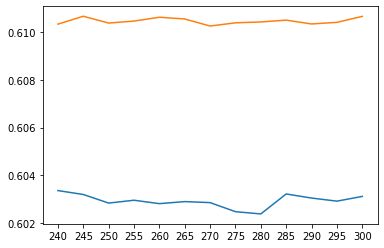

In [ ]:
plt.plot(scores3['Test Score'])
plt.plot(scores3['Train Score'])
plt.xticks(n_ests);

In [ ]:
rf = RandomForestRegressor(max_depth=5, n_estimators=270, random_state = 42)
rf_pipe = make_pipeline(preprocessor, rf)
rf_pipe.fit(X_train, y_train)
rf_train_predictions = rf_pipe.predict(X_train)
rf_test_predictions = rf_pipe.predict(X_test)

In [ ]:
average_sales = round(df_original['Item_Outlet_Sales'].mean(),1)
print(f'Average Item Outlet Sales: {average_sales}\n')

rf_train_r2 = round(r2_score(y_train, rf_train_predictions),3)
rf_test_r2 = round(r2_score(y_test, rf_test_predictions),3)

print(f'Model Training R2: {rf_train_r2}')
print(f'Model Testing R2: {rf_test_r2}\n')

rf_train_MAE = round(mean_absolute_error(y_train, rf_train_predictions),1)
rf_test_MAE = round(mean_absolute_error(y_test, rf_test_predictions),1)

print(f'Model Training MAE: {rf_train_MAE}')
print(f'Model Testing MAE: {rf_test_MAE}\n')


rf_train_MSE = round(mean_squared_error(y_train, rf_train_predictions),1)
rf_test_MSE = round(mean_squared_error(y_test, rf_test_predictions),1)

print(f'Model Training MSE: {rf_train_MSE}')
print(f'Model Testing MSE: {rf_test_MSE}\n')


rf_train_RMSE = round(np.sqrt(rf_train_MSE),1)
rf_test_RMSE = round(np.sqrt(rf_test_MSE),1)

print(f'Model Training RMSE: {rf_train_RMSE}')
print(f'Model Testing RMSE: {rf_test_RMSE}\n')

Average Item Outlet Sales: 2181.3

Model Training R2: 0.61
Model Testing R2: 0.603

Model Training MAE: 755.5
Model Testing MAE: 728.5

Model Training MSE: 1153048.6
Model Testing MSE: 1095196.6

Model Training RMSE: 1073.8
Model Testing RMSE: 1046.5



## Results of the Random Forest Regressor

The Random Forest Regressor performed better than both other models with an R2 of .603.  Even so, it is still not a great explaination of the variation in the data.  It did not overfit the data as measured by the difference in R2 between training and testing.  The mean absolute error of 728.5, or 33% of the average item outlet sale is a little better than other regressions and the RMSE of 1,047 is better than the other and indicates that there are no large outliers.  

All in, the Random Forest Regressor is a better fit of the data though we should continue to look at other options and data processing for improvement.